In [1]:
import pandas as pd
import numpy as np
from Develop.EMD2D import EMD2D
import cv2
from sklearn.preprocessing import minmax_scale
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Interpolations.csv')
df = df.drop(columns=['Channels'])
df = df.apply(lambda x: x.astype('category') if x.dtype=='object' else x)
to_work = df.copy()
interpolations = to_work['Interpolation Method'].unique().astype(str)
colors = ['r', 'g', 'b', 'black', 'purple', 'orange', 'yellow']

# IMF Counter Plotting


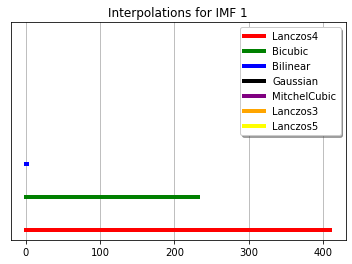

In [3]:
def imf_plot(imf: int):
    temp = to_work[to_work['IMF Spot'] == 'IMF ' + str(imf)]
    counts = np.array([])
    for i in range(len(interpolations)):
        x1 = temp[temp['Interpolation Method'] == interpolations[i]].count()[0]
        x1 = np.linspace(0, x1, 2)
        y = np.repeat((i + 1) * 6, 2)
        counts = np.append(counts, plt.plot(x1, y, colors[i], linewidth = 4))
    plt.title('Interpolations for IMF ' + str(imf))
    plt.grid()
    plt.yticks([])
    plt.legend(counts, interpolations, fancybox=True, shadow=True, framealpha=1)
imf_plot(1)

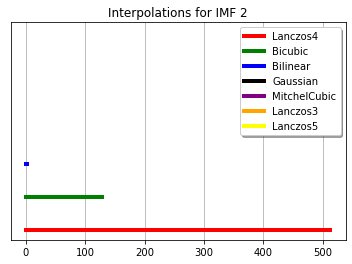

In [4]:
imf_plot(2)

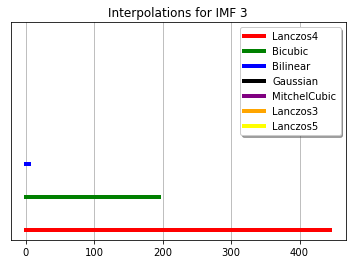

In [5]:
imf_plot(3)

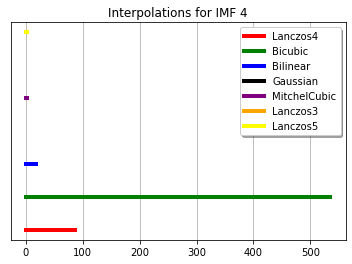

In [6]:
imf_plot(4)

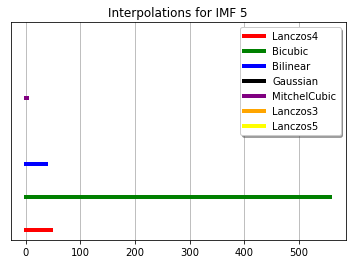

In [7]:
imf_plot(5)

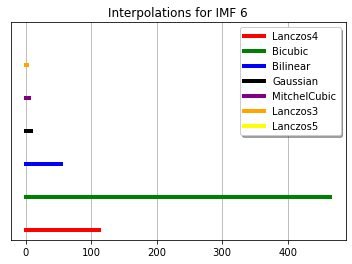

In [8]:
imf_plot(6)


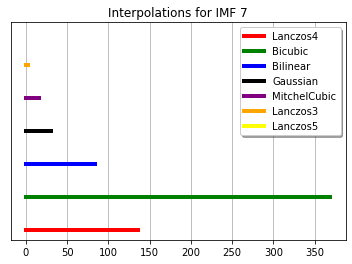

In [9]:
imf_plot(7)

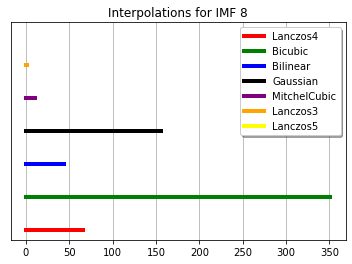

In [10]:
imf_plot(8)


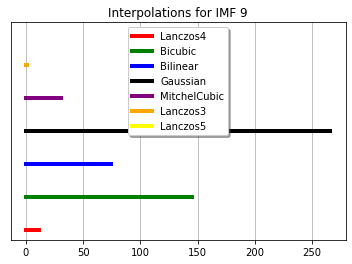

In [11]:
imf_plot(9)


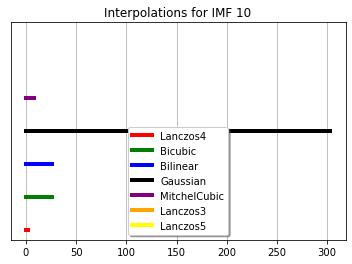

In [12]:
imf_plot(10)


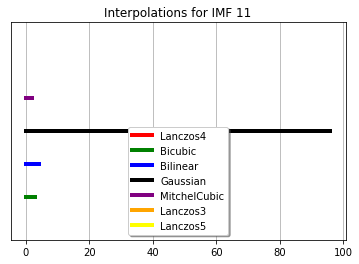

In [13]:
imf_plot(11)


In [14]:
to_work['IMF Spot'] = to_work['IMF Spot'].cat.codes
to_work['File Name'] = to_work['File Name'].cat.codes
to_work['Interpolation Method'] = to_work['Interpolation Method'].cat.codes


# Defining Models + Train-Test Splitting

In [15]:
target = to_work['Interpolation Method'].to_numpy()
to_work = to_work.drop(columns='Interpolation Method').to_numpy()

#to_work = minmax_scale(to_work)
#target = minmax_scale(target)

In [16]:
to_work = (to_work - to_work.min(axis=0))/(to_work.max(axis=0) - to_work.min(axis=0))
x_train, x_test, y_train, y_test = train_test_split(to_work, target)

In [17]:
random_forest = RandomForestClassifier()
random_forest.fit(x_train, y_train)

RandomForestClassifier()

In [18]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [19]:
desicion_tree = DecisionTreeClassifier()
desicion_tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [20]:
ada_boost = AdaBoostClassifier()
ada_boost.fit(x_train, y_train)

AdaBoostClassifier()

In [21]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

c:\Users\tomda\source\pytho\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [25]:
(knn.predict(x_test) == y_test).sum()/len(x_test)

0.72265625

In [26]:
(log_reg.predict(x_test) == y_test).sum()/len(x_test)



0.5481770833333334

In [27]:
(ada_boost.predict(x_test) == y_test).sum()/len(x_test)


0.60546875

In [28]:
(desicion_tree.predict(x_test) == y_test).sum()/len(x_test)


0.6953125

In [29]:
(random_forest.predict(x_test) == y_test).sum()/len(x_test)


0.7578125